In [1]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression # наша модель для классификации
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer # подгружаем датасет
breast_cancer = load_breast_cancer()

In [5]:
Y = breast_cancer.target ## Наша целевая переменная, 0 — если рака нет, 1 — если есть 
X = breast_cancer.data # X - признаки, по которым мы будем предсказывать рак 

In [9]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3)
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\gorba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))
print(precision_score(Y_val,Y_predicted))
print(recall_score(Y_val,Y_predicted))
print(f1_score(Y_val,Y_predicted))

NameError: name 'model' is not defined

Загрузите встроенный в библиотеку sklearn датасет про ирисы с помощью функции load_iris. Обучите модель логистической регрессии (random_state=50, размер тестовой выборки 0.3) и укажите полученное значение метрики .
Ответ округлите до сотых.

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()
# iris

In [20]:
Y = iris.target ## Наша целевая переменная, 0 — если рака нет, 1 — если есть 
X = iris.data

In [25]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state=50)
model = LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\gorba\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [26]:
Y_predicted = model.predict(X_val)
print(accuracy_score(Y_val,Y_predicted))

0.9777777777777777


In [34]:
df = pd.read_csv('train_mobile.xls', sep =';')

In [35]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

<AxesSubplot:>

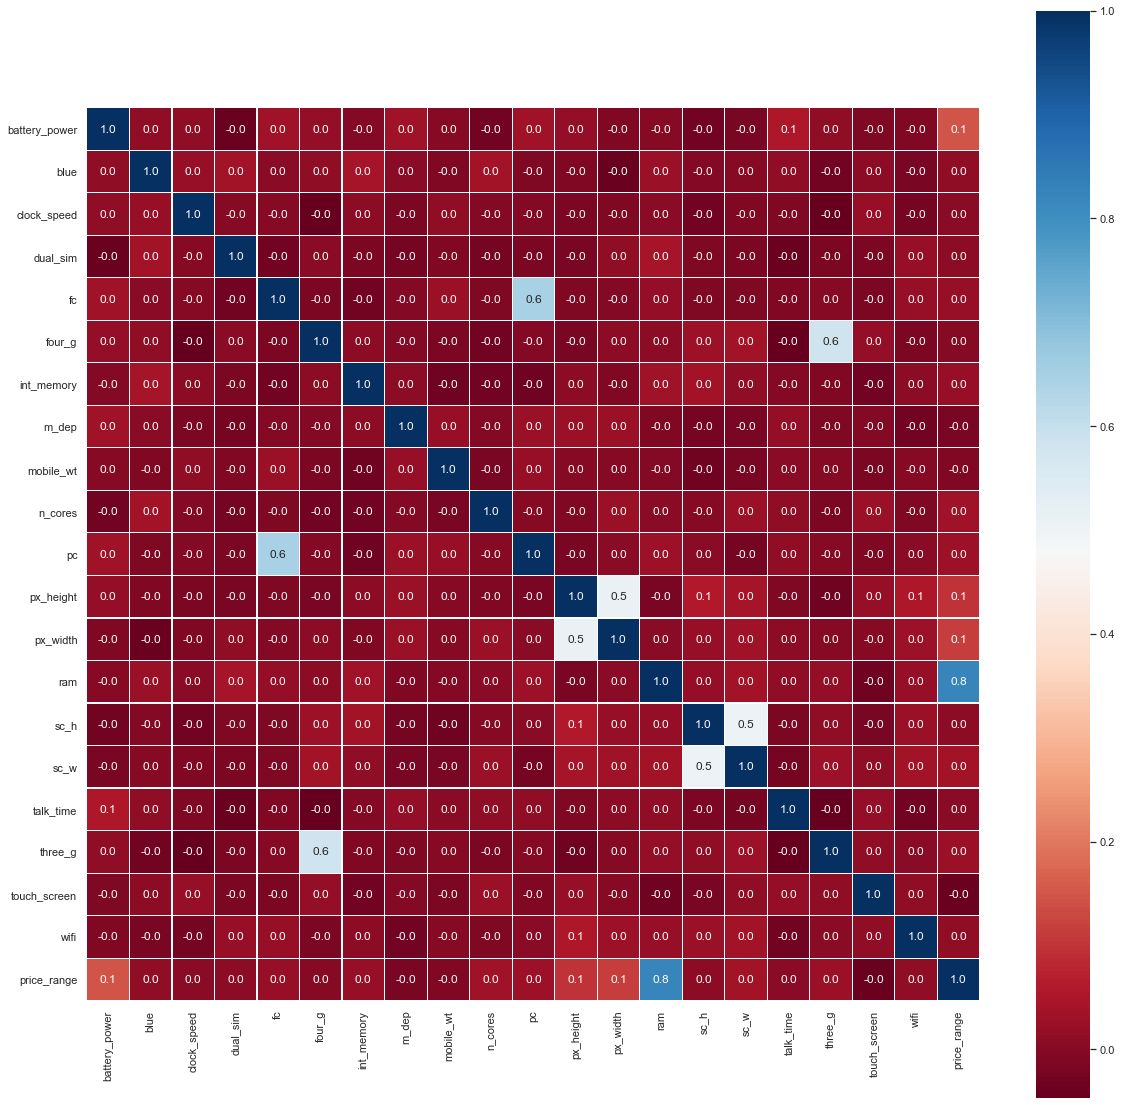

In [56]:
sns.set(font_scale=1)
plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu")

Теперь необходимо обучить алгоритм.  Для начала разбейте выборку на тестовую и обучающую, размер тестовой задайте 0.2. Параметр random_state=31. В качестве модели возьмите логистическую регрессию. В качестве предикторов возьмите пять ранее отобранных признаков.

Рассчитайте метрику, которая покажет, какая доля телефонов, обозначенных классификатором как дорогие, действительно относится к этой категории. 

In [63]:
# X = df.drop(['price_range'], axis=1)
X = df[['battery_power', 'px_height', 'px_width', 'ram']]
Y = df['price_range']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=31)

In [69]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [3]:
Y_predicted = model.predict(X_test)
print(accuracy_score(y_test,Y_predicted))
print(precision_score(y_test,Y_predicted))
print(recall_score(y_test,Y_predicted))
print(f1_score(y_test,Y_predicted))

NameError: name 'model' is not defined

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.model_selection import KFold 
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]]) 
y = np.array([1, 2, 3, 4]) 
kf = KFold(n_splits=2)  #реализация разбиения
kf.get_n_splits(X) #возвращает количество разбиений
kf.split(X) #возвращает индексы для разбиения

<generator object _BaseKFold.split at 0x0000027BC6413BC8>

In [13]:
import pandas as pd

iris_data = pd.read_csv('iris.CSV', 
                        names=['sepal_length', 'sepal_width', 
                               'petal_length', 'petal_width', 'class'])

In [14]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [19]:
iris_data = iris_data.drop(iris_data.index[[0]])

In [21]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
from sklearn.model_selection import train_test_split

train, valid = train_test_split(iris_data, test_size=0.15, shuffle=True)

print('Размер исходной выборки: {}\nРазмер тренировочной выборки: {}\nРазмер валидационной выборки: {}'
      .format(iris_data.shape, train.shape, valid.shape)
)

Размер исходной выборки: (150, 5)
Размер тренировочной выборки: (127, 5)
Размер валидационной выборки: (23, 5)


In [23]:
def visualize_train_valid_counts(init_data, train, valid):
    x = np.array([0, 1, 2])
    width = 0.2

    plt.figure(figsize=(15, 8))
    ax = plt.subplot(111)

    classes = list(init_data['class'].value_counts().index)

    ax.bar(x - width, list(init_data['class'].value_counts()[classes]), width, color='r', label='Исходные данные')
    ax.bar(x, list(train['class'].value_counts()[classes]), width, color='g', label='Тренировочная выборка')
    ax.bar(x, list(valid['class'].value_counts()[classes]), width, bottom=list(train['class'].value_counts()[classes]), color='b', label='Валидационная выборка')

    ax.set_ylim([0, 70])
    plt.xticks(x - width / 2, classes, fontsize=20)
    plt.yticks(fontsize=15)
    plt.ylabel('Кол-во примеров', fontsize=20)
    plt.minorticks_on()
    plt.grid(which='major', color='r')
    plt.grid(which='minor', linestyle=':', color='k')
    plt.legend(fontsize=15)

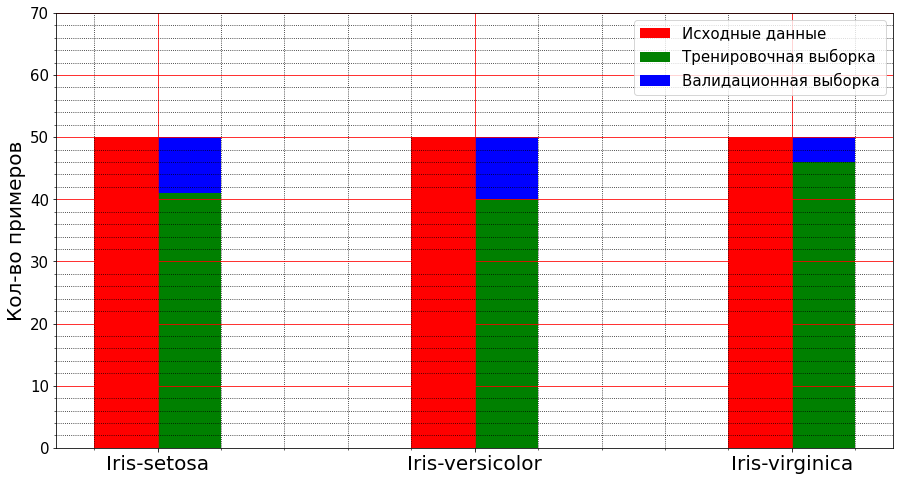

In [26]:
visualize_train_valid_counts(iris_data, train, valid)

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.15)
train_indices, valid_indices = [split for split in sss.split(iris_data.iloc[:, :4], iris_data.iloc[:, 4])][0]
s_train = iris_data.iloc[train_indices]
s_valid = iris_data.iloc[valid_indices]

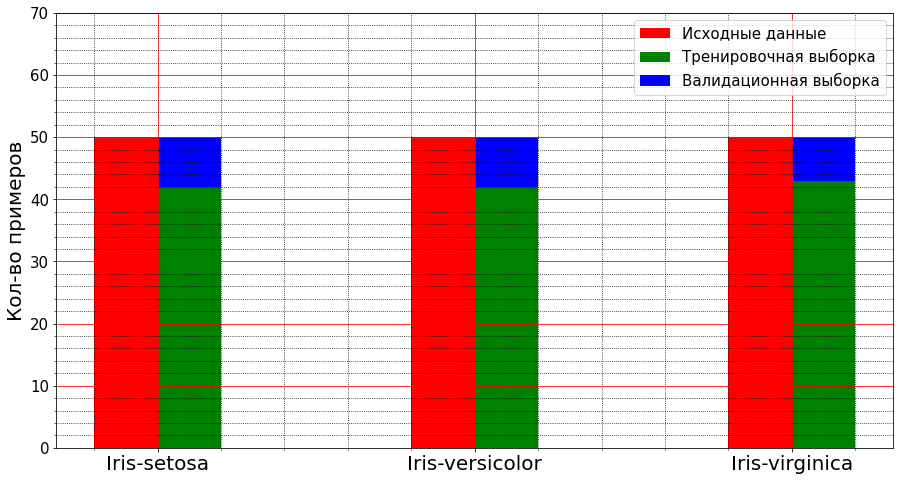

In [29]:
visualize_train_valid_counts(iris_data, s_train, s_valid)

In [30]:
valid_frac = 0.15
test_frac = 0.15

valid_count = int(valid_frac * iris_data.shape[0])
test_count = int(test_frac * iris_data.shape[0])

train, valid_test = train_test_split(iris_data, 
                                     test_size=(valid_count + test_count))
valid, test = train_test_split(valid_test, test_size=test_count)

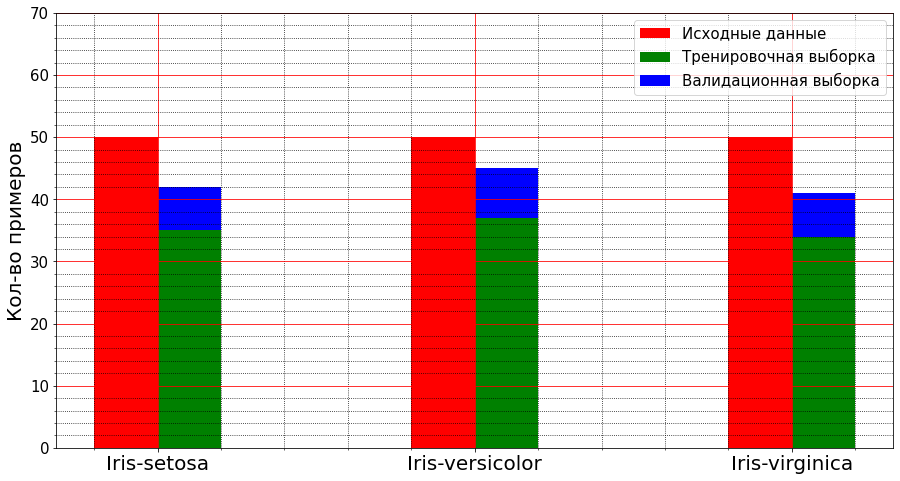

In [32]:
visualize_train_valid_counts(iris_data, train, valid)

Второй тип разбиения — k-fold, перекрёстная валидация. Сделаем k-fold разбиение данных, используя класс KFold:

In [34]:
from sklearn.model_selection import KFold

# shuffle=False исключает предварительное перемешивание примеров
kf = KFold(n_splits=3, shuffle=False)

for train_index, valid_index in kf.split(iris_data):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [ 50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149]
valid indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
train indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 

In [36]:
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

for train_index, valid_index in loo.split(iris_data[:5]):
    print('train indices: {}\nvalid indices: {}'.format(train_index, valid_index))
    print('='*20)

train indices: [1 2 3 4]
valid indices: [0]
train indices: [0 2 3 4]
valid indices: [1]
train indices: [0 1 3 4]
valid indices: [2]
train indices: [0 1 2 4]
valid indices: [3]
train indices: [0 1 2 3]
valid indices: [4]


Загрузите данные train.csv, разделите выборку на обучающую и тестовую части в соотношении 70% на 30% без перемешивания. Найдите среднее значение для признака payment_amount и запишите его в переменную result. Обратите внимание, что среднее нужно считать по тестовой выборке.

In [45]:
df =  pd.read_csv('train_ML.CSV', encoding = 'ISO-8859-1', low_memory = False)
df.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


In [50]:
train, valid = train_test_split(df, test_size=0.3, shuffle=False)
result = train.payment_amount.mean()
result

55.22498030979261

In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

iris_data = pd.read_csv('iris.CSV', 
                        names=['sepal_length', 'sepal_width', 
                               'petal_length', 'petal_width', 'class'])

# Функция, выбирающая один класс из заданного кол-ва классов
def monetka(n_classes=3):
    classes = np.arange(n_classes)
    predicted = np.random.choice(classes)
    
    return predicted

# Определить количество примеров, классов и сформировать словарь для конвертирования имени класса в порядковое число
n = iris_data.shape[0]
class_to_num = {cl: num for num, cl in enumerate(np.unique(iris_data['class']))}
n_classes = len(class_to_num)

# Истинные значения
y = np.array(iris_data['class'].apply(lambda cl: class_to_num[cl]))

# Предсказанные монеткой значения
y_pred = np.array([monetka(n_classes) for _ in range(n)])
y_hat = np.zeros((n, n_classes), dtype=np.float32)
for num in class_to_num.values():
    y_hat[:, num] = 1. * (y_pred == num)

from sklearn.metrics import log_loss

# Посчитаем значение ошибки
log_loss(y, y_hat)

27.219300604813935

Для более понятных человеку результатов рассмотрим класс популярных метрик, относящихся к бинарной классификации. Для подсчёта метрик возьмём искусственную задачу, где определим истинные классы следующим образом:

In [52]:
n = 100    # размер выборки
p = 0.1    # доля примеров класса 1

from scipy import stats

# Сгенерируем n примеров с долей единиц равной p
dist = stats.bernoulli(p)
y_true = dist.rvs(n)
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


Первая метрика, которую мы посмотрим — Accuracy или точность, самая базовая и простая. Посчитаем метрику:

In [56]:
def calc_accuracy(y_true, y_pred):
    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))

    acc = (TP + TN) / (P + N)
    
    return acc, TP, TN, P, N

In [60]:
y_pred = np.array([monetka(2) for _ in range(n)])

In [64]:
acc, TP, TN, P, N = calc_accuracy(y_true, y_pred)
print('TP = {}\nTN = {}\nP = {}\nN = {}\nacc = {}%'.format(TP, TN, P, N, acc))

TP = 4
TN = 50
P = 5
N = 95
acc = 0.54%


In [65]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_true, 1 - y_pred)
recall = recall_score(y_true, 1 - y_pred)
print('precision: {:.2f}\nrecall: {:.2f}'.format(precision, recall))

precision: 0.02
recall: 0.20


In [66]:
from sklearn.metrics import f1_score

f1 = f1_score(y_true, y_pred)
print('F1-score: {:.2f}'.format(f1))

F1-score: 0.15


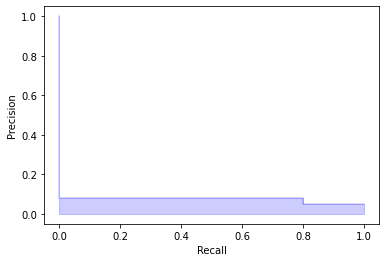

In [67]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, _ = precision_recall_curve(y_true, y_pred)

plt.step(recalls, precisions, color='b', alpha=0.2, where='post')
plt.fill_between(recalls, precisions, step='post', alpha=0.2, color='b')
plt.xlabel('Recall');
plt.ylabel('Precision');

In [69]:
from sklearn.metrics import confusion_matrix

# Определить количество примеров, классов и сформировать словарь для конвертирования имени класса в порядковое число
n = iris_data.shape[0]
class_to_num = {cl: num for num, cl in enumerate(np.unique(iris_data['class']))}
n_classes = len(class_to_num)

# Истинные значения
y_true = np.array(iris_data['class'].apply(lambda cl: class_to_num[cl]))

# Предсказанные монеткой значения
y_pred = np.array([monetka(n_classes) for _ in range(n)])

conf_mat = confusion_matrix(y_true, y_pred).T
print('Confusion matrix:\n{}'.format(conf_mat))

Confusion matrix:
[[11  4 15  0]
 [14 17  6  0]
 [13 14 14  0]
 [12 15 15  1]]


Загрузите данные train.csv, оставьте в данных только признаки 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', затем избавьтесь от пропусков. Целевой переменной будет 'balance_due', разделите данные на обучающую и тестовую выборки в соотношении 70% на 30% без перемешивания. Обучите линейную регрессию из scikit-learn и запишите в переменную result значение метрики RMSE на тестовой выборке.

In [86]:
df =  pd.read_csv('train_ML.CSV', encoding = 'ISO-8859-1', low_memory = False)
df.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


In [91]:
# data['price_doc'] = data['price_doc'].apply(lambda w: np.log(w + 1))
# data.drop(['kremlin_km','preschool_education_centers_raion', 'kindergarten_km',
#     'park_km', 'id', 'life_sq'], axis=1, inplace=True)
# data = data.dropna()
# X = data.drop(['price_doc'], axis=1)
# y = data['price_doc']

df = df.loc[:, ['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']]
df = df.dropna()

In [93]:
X = df.drop(['balance_due'], axis=1)
Y = df['balance_due']

In [95]:
# train, valid = train_test_split(iris_data, test_size=0.15, shuffle=True)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, shuffle=False)

In [97]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# model = LogisticRegression()
# model.fit(X_train, y_train)

LinearRegression()

In [113]:
from sklearn.metrics import mean_squared_error
from math import sqrt
Y_predicted = reg.predict(X_test)
# rmse = sqrt(mean_squared_error(y_test, Y_predicted))
# rmse
rmse = sqrt(mean_squared_error(y_test, Y_predicted))
rmse

132.08033445901273

In [1]:
vis_data_small = df[['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due']].dropna()
X = vis_data_small[['fine_amount', 'state_fee', 'late_fee', 'discount_amount']]
y = vis_data_small['balance_due']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
clf =  linear_model.LinearRegression()
clf.fit(X_train, y_train)
result = np.sqrt(mean_squared_error(y_test, clf.predict(X_test)))      
result

NameError: name 'df' is not defined

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score 
from sklearn.metrics import cohen_kappa_score

Используя библиотеку sklearn, найдите метод для подсчёта метрики accuracy. Создайте два одинаковых списка, состоящих из  одинаковых чисел. Замените в одном списке одно число на любое другое, отправьте эти списки в метод для подсчёта . Что выдаст алгоритм на выходе? Ответ запишите с точностью до сотых, в качестве разделителя используйте точку.

In [6]:
x_list=[]
y_list = []
i = 0
while i<101:
    x_list.append(i)
    y_list.append(i)
    i += 1

In [10]:
x_list[5] = 87

In [13]:
accuracy_score(x_list, y_list)

0.9900990099009901

На этапе вычисления метрик вы получили результаты precision = 0.75 и recall = 0.6. Посчитайте значение метрики . Округлите до сотых и запишите результат.

In [16]:
precision = 0.75
recall = 0.6
F1 = 2 * (precision * recall) / (precision + recall)
F1

0.6666666666666665

In [18]:
y_true = [0, 0, 1, 1, 1, 1, 0, 1]
y_pred = [0, 1, 0, 0, 1, 1, 0, 1]
f1_score(y_true, y_pred)

0.6666666666666665

In [20]:
precision_score(y_true, y_pred)

0.75

In [23]:
recall_score(y_true, y_pred)

0.6

# Реализуем бинарную классификацию записей голосов (мужских и женских) на основе характеристик записей их разговоров.

In [42]:
import pandas as pd
df =  pd.read_csv('voiceDataSet.csv')

In [43]:
df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


Попробуйте построить модель, предсказывающую пол обладателя записи голоса.

Для этого:

Разделите выборку на обучающую и тренировочную с параметрами test_size=0.3, random_state=42.

Нормализуйте признаки с помощью функции StandardScaler(). Учитывайте, что нормализация тестовой выборки производится по среднему и отклонению тренировочной, которую мы считаем репрезентативной относительно генеральной совокупности.

Обучите модель логистической регрессии на подготовленных данных.

In [44]:
from sklearn.model_selection import train_test_split # функция, чтобы разбить данные на трейн и тест
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [41]:
X = df.drop(['label'], axis=1)
Y = df['label']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [52]:
Y_predicted = model.predict(X_test_scaled)

In [54]:
accuracy_score(Y_test, Y_predicted)

0.9726603575184016

In [56]:
glass = pd.read_csv('glass.csv')

In [58]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# kNN (метод ближайших соседей)

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=5)
cross_val_score(model, X, Y, cv=kf, scoring="accuracy")

array([0.44479495, 0.5362776 , 0.67665615, 0.57503949, 0.48973144])

In [67]:
model=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=10)
cross_val_score(model, X, Y, cv=kf, scoring="accuracy").mean()

0.6148604400431258

# В следующей задаче мы будем диагностировать болезни сердца по различным медицинским параметрам пациентов.

In [176]:
df =  pd.read_csv('heart_fin1.csv', sep = ';')

In [177]:
df.sample(10)

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
49,53,0,0,138,234,0,160,0,0.0,1
187,54,1,0,124,266,0,109,1,2.2,0
268,54,1,0,122,286,0,116,1,3.2,0
61,54,1,1,108,309,1,156,0,0.0,1
100,42,1,3,148,244,0,178,0,0.8,1
135,49,0,0,130,269,1,163,0,0.0,1
283,40,1,0,152,223,1,181,0,0.0,0
103,42,1,2,120,240,1,194,0,0.8,1
300,68,1,0,144,193,1,141,0,3.4,0
276,58,1,0,146,218,1,105,0,2.0,0


Избавьтесь от выбросов, чтобы они не ухудшили качество нашей модели. Для того, чтобы избавиться от выбросов, уберите все данные, значения признаков которых отстают от первого или третьего квартиля более, чем на 1.5 межквартильного размаха.

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
df =  pd.read_csv('heart_fin1.csv', sep = ';')
for col in df.columns:
    Q3 = np.quantile(df[col], 0.75, interpolation='midpoint')
    Q1 = np.quantile(df[col], 0.25, interpolation='midpoint')
    mkr =  round(np.quantile(df[col], 0.75, interpolation='midpoint') - 
                 np.quantile(df[col], 0.25, interpolation='midpoint'),  1)
    for i in range(len(df[col])):
        if ((df[col].iloc[i] >= Q3 + (mkr * 1.5)) | (df[col].iloc[i] <= Q1 - (mkr * 1.5))):
            print(df[col].iloc[i], col)
            df = df.replace(df[col].iloc[i], np.nan)
            print(df[col].iloc[i], col, 'outliner deleted')

172 trestbps
nan trestbps outliner deleted
178.0 trestbps
nan trestbps outliner deleted
180.0 trestbps
nan trestbps outliner deleted
170.0 trestbps
nan trestbps outliner deleted
200.0 trestbps
nan trestbps outliner deleted
174.0 trestbps
nan trestbps outliner deleted
192.0 trestbps
nan trestbps outliner deleted
4.2 oldpeak
nan oldpeak outliner deleted
6.2 oldpeak
nan oldpeak outliner deleted
4.0 oldpeak
nan oldpeak outliner deleted
5.6 oldpeak
nan oldpeak outliner deleted
4.4 oldpeak
nan oldpeak outliner deleted


# Нахождение выбросов

In [223]:
data =  pd.read_csv('heart_fin1.csv', sep = ';')
q25 = data.quantile(0.25)
q75 = data.quantile(0.75)
iqr = q75 - q25
upper = q75 + 1.5 * iqr
lower = q25 - 1.5 * iqr
clear_data = data[((data >= lower) & (data <= upper)).all(axis=1)]

In [220]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (8, 3))
    sns.boxplot(x='target', y=column,
                data=data,
               ax=ax)
    plt.xticks()
#     ax.set_title('Boxplot for ' + column)
    plt.show()

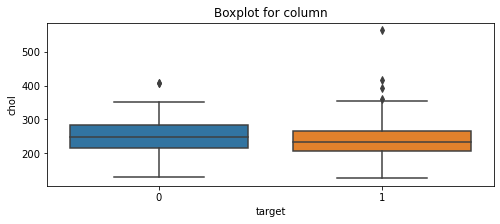

In [218]:
get_boxplot(data.chol)

In [230]:
df = clear_data
df.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
0,63,1,3,145,233,0,150,0,2.3,1
1,37,1,2,130,250,1,187,0,3.5,1
2,41,0,1,130,204,0,172,0,1.4,1
3,56,1,1,120,236,1,178,0,0.8,1
4,57,0,0,120,354,1,163,1,0.6,1


In [231]:
X = df.drop(['target'], axis=1)
Y = df['target']

In [232]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state=5)

In [239]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
print(cross_val_score(model, X_train, Y_train, scoring='roc_auc').mean())

0.8827551020408164


In [1]:
model_k=KNeighborsClassifier(n_neighbors=3)
kf = KFold(n_splits=5)
print(cross_val_score(model_k,  X_train, Y_train, cv=kf, scoring='roc_auc'))

NameError: name 'KNeighborsClassifier' is not defined

# DecisionTreeClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
titanic = pd.read_csv('titanic.csv')
titanic.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [8]:
# Заменить категориальный признак "Sex" на два признака "female" и "male" с бинарными значениями
sex_dummies = pd.get_dummies(titanic['Sex'])
titanic = titanic.drop('Sex', axis=1).join(sex_dummies)
# Отбросить имя человека из выборки
titanic = titanic.drop('Name', axis=1)
# Отделим target от признаков
X, y = titanic.iloc[:, 1:], titanic.iloc[:, 0]

KeyError: "['Name'] not found in axis"

Загрузите данные train.csv, оставьте в данных только признаки 'fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance', затем избавьтесь от пропусков.

In [12]:
df =  pd.read_csv('train_16.02.csv', encoding = 'ISO-8859-1', low_memory = False)

In [14]:
df.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


In [16]:
df = df.loc[:, ['fine_amount', 'state_fee', 'late_fee', 'discount_amount', 'balance_due', 'compliance']]
df = df.dropna()

Целевой переменной будет 'compliance', разделите данные на обучающую и тестовую выборки в соотношении 70%/30% без перемешивания.

Обучите DecisionTreeClassifier из scikit-learn с параметром random_state=23. Посчитайте значения метрики  на тренировочной выборке и на тестовой выборке. Вычтите из значения метрики на тренировочной выборки значение метрики на тестовой выборке и запишите результат в переменную result.

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [21]:
X = df.drop(['compliance'], axis=1)
y = df['compliance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)